## Iris Data
#### Outline:
- [General Information](#Part1)<br>
- [Support Vector Machine](#SuportVectorMachine)


In [1]:
#!pip install pandas-profiling

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import pandas_profiling

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

### Iris Versicolor
<a id="Part1"></a>
![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

In [4]:
df.sample(20).T

,146,89,74,136,45,11,134,114,8,64,50,128,2,80,126,105,103,35,111,120
sepal_length,6.3,5.5,6.4,6.3,4.8,4.8,6.1,5.8,4.4,5.6,7,6.4,4.7,5.5,6.2,7.6,6.3,5,6.4,6.9
sepal_width,2.5,2.5,2.9,3.4,3,3.4,2.6,2.8,2.9,2.9,3.2,2.8,3.2,2.4,2.8,3,2.9,3.2,2.7,3.2
petal_length,5,4,4.3,5.6,1.4,1.6,5.6,5.1,1.4,3.6,4.7,5.6,1.3,3.8,4.8,6.6,5.6,1.2,5.3,5.7
petal_width,1.9,1.3,1.3,2.4,0.3,0.2,1.4,2.4,0.2,1.3,1.4,2.1,0.2,1.1,1.8,2.1,1.8,0.2,1.9,2.3
species,virginica,versicolor,versicolor,virginica,setosa,setosa,virginica,virginica,setosa,versicolor,versicolor,virginica,setosa,versicolor,virginica,virginica,virginica,setosa,virginica,virginica


In [5]:
df.profile_report(style={'full_width':True})

In [6]:
set(df["species"])

{'setosa', 'versicolor', 'virginica'}

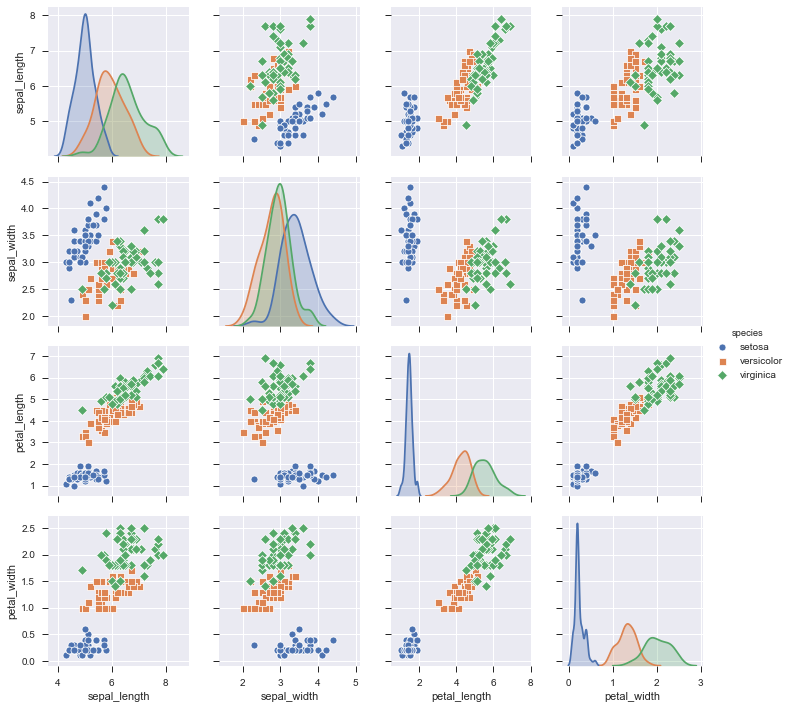

In [7]:
g = sns.pairplot(df, hue="species", markers=["o", "s", "D"])

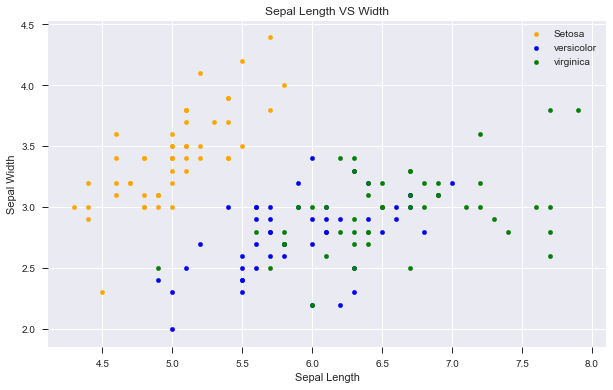

In [8]:
iris = df
fig = iris[iris.species=='setosa'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='orange', label='Setosa')
iris[iris.species=='versicolor'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='blue', label='versicolor',ax=fig)
iris[iris.species=='virginica'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

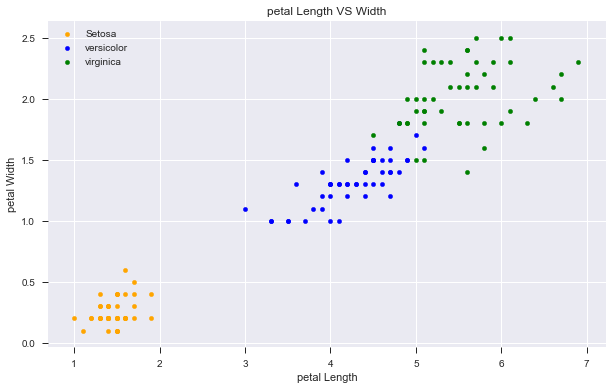

In [9]:
fig = iris[iris.species=='setosa'].plot(kind='scatter',x='petal_length',y='petal_width',color='orange', label='Setosa')
iris[iris.species=='versicolor'].plot(kind='scatter',x='petal_length',y='petal_width',color='blue', label='versicolor',ax=fig)
iris[iris.species=='virginica'].plot(kind='scatter',x='petal_length',y='petal_width',color='green', label='virginica', ax=fig)
fig.set_xlabel("petal Length")
fig.set_ylabel("petal Width")
fig.set_title("petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

## Machine Learning
![image](https://scikit-learn.org/stable/_static/ml_map.png)


In [10]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

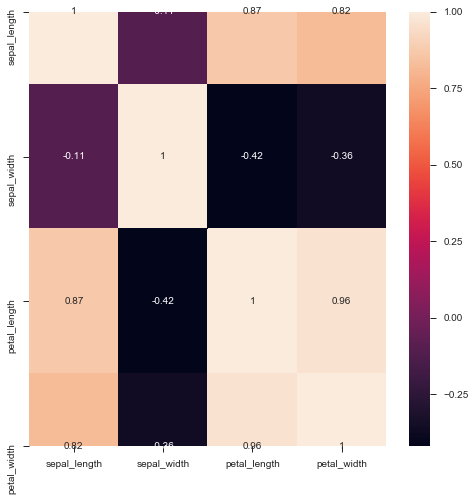

In [11]:
plt.figure(figsize=(8,8)) 
sns.heatmap(iris.corr(),annot=True) #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [12]:
train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [13]:
#test_X.head()

In [14]:
train_X = train[['sepal_length','sepal_width','petal_length','petal_width']]# taking the training data features
train_y=train.species# output of our training data
test_X= test[train.columns[0:4].values] # taking test data features
test_y =test.species   #output value of test data

## Support Vector Machine<a id="SuportVectorMachine"></a>

### 0. Introduction
- A Support Vector Machine (SVM) is a **discriminative classifier** formally defined by a separating hyperplane. 
- In other words, given labeled training data (supervised learning), **the algorithm outputs an optimal hyperplane which categorizes new examples**. 
 - In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.
- Confusing? Don’t worry, we shall learn in laymen terms.
- Suppose you are given plot of two label classes on graph as shown in image (A). Can you decide a separating line for the classes?
![image.png](https://miro.medium.com/max/1200/1*BpeH5_M58kJ5xXfwzxI8yA.png)
Image A: Draw a line that separates black circles and blue squares.
- You might have come up with something similar to following image (image B). 
 - It fairly separates the two classes. 
 - Any point that is left of line falls into black circle class and on right falls into blue square class. 
 - Separation of classes. 
 - That’s what SVM does. 
 - It finds out a line/ hyper-plane (in multidimensional space that separate outs classes). Shortly, we shall discuss why I wrote multidimensional space.
![image.png](https://miro.medium.com/max/1200/1*Sg6wjASoZHPphF10tcPZGg.png)
s Image B: Sample cut to divide into two classes.

### 1. Making it a Bit complex…
- So far so good. Now consider what if we had data as shown in image below? Clearly, there is no line that can separate the two classes in this x-y plane. So what do we do? 
- We apply transformation and add one more dimension as we call it z-axis. 
- Lets assume value of points on z plane, w = x² + y². 
- In this case we can manipulate it as distance of point from z-origin. Now if we plot in z-axis, a clear separation is visible and a line can be drawn .
![image.png](https://miro.medium.com/max/1200/1*fv8DDZLaR0t7SO-W6tdDAg.png)
Can you draw a separating line in this plane?
![Image](https://miro.medium.com/max/1200/1*FLolUnVUjqV0EGm3CYBPLw.png)
plot of zy axis. A separation can be made here.
- When we transform back this line to original plane, it maps to circular boundary as shown in image E. **These transformations are called kernels.**
![image](https://miro.medium.com/max/1200/1*NN5VCpVg9gPCLYrDl0YFYw.png)
Transforming back to x-y plane, a line transforms to circle.
- Thankfully, you don’t have to guess/ derive the transformation every time for your data set. The sklearn library's SVM implementation provides it inbuilt.

### 2. Making it a little more complex…
- What if data plot overlaps? Or, what in case some of the black points are inside the blue ones? Which line among 1 or 2?should we draw?
![image](https://miro.medium.com/max/1200/1*fv8DDZLaR0t7SO-W6tdDAg.png)
What in this case?
![image](https://miro.medium.com/max/1200/1*1dwut8cWQ-39POHV48tv4w.png)
Image 1
![image](https://miro.medium.com/max/1200/1*gt_dkcA5p0ZTHjIpq1qnLQ.png)
Image 2
- Which one do you think? Well, both the answers are correct. 
 - The first one tolerates some outlier points. 
 - The second one is trying to achieve 0 tolerance with perfect partition.
 - But, there is trade off. In real world application, finding perfect class for millions of training data set takes lot of time. As you will see in coding. This is called regularization parameter. In next section, we define two terms **regularization parameter and gamma**. These are tuning parameters in SVM classifier. Varying those we can achive considerable non linear classification line with more accuracy in reasonable amount of time. In coding exercise (part 2 of this chapter) we shall see how we can increase the accuracy of SVM by tuning these parameters.
- One more parameter is kernel. It defines whether we want a linear of linear separation. This is also discussed in next section.
- When somebody asks me for advice.

### 3. Tuning parameters: Kernel, Regularization, Gamma and Margin.
#### Kernel
- The learning of the hyperplane in linear SVM is done by transforming the problem using some linear algebra. This is where the kernel plays role.
- For linear kernel the equation for prediction for a new input using the dot product between the input (x) and each support vector (xi) is calculated as follows:
 - f(x) = B(0) + sum(ai * (x,xi))
- This is an equation that involves calculating the inner products of a new input vector (x) with all support vectors in training data. The coefficients B0 and ai (for each input) must be estimated from the training data by the learning algorithm.
- The polynomial kernel can be written as 
K(x,xi) = 1 + sum(x * xi)^d and exponential as K(x,xi) = exp(-gamma * sum((x — xi²)). 
[Source for this excerpt : http://machinelearningmastery.com/].
- Polynomial and exponential kernels calculates separation line in higher dimension. This is called kernel trick

#### Regularization
- The Regularization parameter (often termed as C parameter in python’s sklearn library) tells the SVM optimization **how much you want to avoid misclassifying each training example**.
- For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.
- The images below (same as image 1 and image 2 in section 2) are example of two different regularization parameter. Left one has some misclassification due to lower regularization value. Higher value leads to results like right one.
![](https://miro.medium.com/max/1200/1*1dwut8cWQ-39POHV48tv4w.png)

![](https://miro.medium.com/max/1200/1*gt_dkcA5p0ZTHjIpq1qnLQ.png)

Left: low regularization value, right: high regularization value
#### Gamma
- The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. In other words, with low gamma, points far away from plausible seperation line are considered in calculation for the seperation line. Where as high gamma means the points close to plausible line are considered in calculation.
 - High Gamma ![](https://miro.medium.com/max/1200/1*dGDQxV8j83VB90skHsXktw.png)
 - Low Gamma ![](https://miro.medium.com/max/1200/1*ClmsnU_yb1YtIwAAr7krmg.png)
#### Margin
And finally last but very importrant characteristic of SVM classifier. SVM to core tries to achieve a good margin.
A margin is a separation of line to the closest class points.
A good margin is one where this separation is larger for both the classes. Images below gives to visual example of good and bad margin. A good margin allows the points to be in their respective classes without crossing to other class.

4. In next part of this chapter,
In next part (here) we shall tweak and play tuning parameters and implement a mini project for SVM classifier (also known as SVC) using python’s sklearn library. We shall compare the results with the Naive Bayes Classfier. Check out coding part here : https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-coding-edd8f1cf8f2d.
5. Conclusion
I hope that this section was helpful in understanding the working behind SVM classifier. Comment down your thoughts, feedback or suggestions if any below. If you liked this post, share it with your friends, subscribe to Machine Learning 101 click the heart(❤) icon. Peace!

In [15]:
model = svm.SVC(gamma='auto') #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 1.0


In [16]:
test_X

,sepal_length,sepal_width,petal_length,petal_width
95,5.7,3.0,4.2,1.2
94,5.6,2.7,4.2,1.3
27,5.2,3.5,1.5,0.2
98,5.1,2.5,3.0,1.1
122,7.7,2.8,6.7,2.0
71,6.1,2.8,4.0,1.3
44,5.1,3.8,1.9,0.4
37,4.9,3.1,1.5,0.1
112,6.8,3.0,5.5,2.1
60,5.0,2.0,3.5,1.0


In [17]:
#model.predict([4,4,4,4])

In [18]:
test_X[1:2]

,sepal_length,sepal_width,petal_length,petal_width
94,5.6,2.7,4.2,1.3


In [19]:
test_y[1:2]

94    versicolor
Name: species, dtype: object

## Linear Regression

Before knowing what is linear regression, let us get ourselves accustomed to regression. Regression is a method of modelling a target value based on independent predictors. This method is mostly used for forecasting and finding out cause and effect relationship between variables. Regression techniques mostly differ based on the number of independent variables and the type of relationship between the independent and dependent variables.
![](https://miro.medium.com/max/2400/0*szXvH1a4ZQytyqhg.png)
Linear Regression
Simple linear regression is a type of regression analysis where the number of independent variables is one and there is a linear relationship between the independent(x) and dependent(y) variable. The red line in the above graph is referred to as the best fit straight line. Based on the given data points, we try to plot a line that models the points the best. The line can be modelled based on the linear equation shown below.
\begin{equation*}
y = a_0 + a_1 * x
\end{equation*}
The motive of the linear regression algorithm is to find the best values for a_0 and a_1. Before moving on to the algorithm, let’s have a look at two important concepts you must know to better understand linear regression.

### Cost Function
The cost function helps us to figure out the best possible values for a_0 and a_1 which would provide the best fit line for the data points. Since we want the best values for a_0 and a_1, we convert this search problem into a minimization problem where we would like to minimize the error between the predicted value and the actual value.![](https://miro.medium.com/max/972/1*wQCSNJ486WxL4mZ3FOYtgw.png)
We choose the above function to minimize. The difference between the predicted values and ground truth measures the error difference. We square the error difference and sum over all data points and divide that value by the total number of data points. This provides the average squared error over all the data points. Therefore, this cost function is also known as the Mean Squared Error(MSE) function. Now, using this MSE function we are going to change the values of a_0 and a_1 such that the MSE value settles at the minima.

### Gradient Descent
The next important concept needed to understand linear regression is gradient descent. Gradient descent is a method of updating a_0 and a_1 to reduce the cost function(MSE). The idea is that we start with some values for a_0 and a_1 and then we change these values iteratively to reduce the cost. Gradient descent helps us on how to change the values.
![](https://miro.medium.com/proxy/0*QwE8M4MupSdqA3M4.png)
To draw an analogy, imagine a pit in the shape of U and you are standing at the topmost point in the pit and your objective is to reach the bottom of the pit. There is a catch, you can only take a discrete number of steps to reach the bottom. If you decide to take one step at a time you would eventually reach the bottom of the pit but this would take a longer time. If you choose to take longer steps each time, you would reach sooner but, there is a chance that you could overshoot the bottom of the pit and not exactly at the bottom. In the gradient descent algorithm, the number of steps you take is the learning rate. This decides on how fast the algorithm converges to the minima.
![](https://miro.medium.com/max/926/0*GrBkYv2vodl_swFI.png)
Convex vs Non-convex function
- Sometimes the cost function can be a non-convex function where you could settle at a local minima but for linear regression, it is always a convex function.
![](https://miro.medium.com/max/1132/1*fr-f6K1ebanMA4Roz8JENA.png)
![](https://miro.medium.com/max/2276/1*D4Q7zeRBmZ3z1CbD37CIhg.png)
- You may be wondering how to use gradient descent to update a_0 and a_1. 
 - To update a_0 and a_1, we take gradients from the cost function. 
 - To find these gradients, we take partial derivatives with respect to a_0 and a_1. 
 - Now, to understand how the partial derivatives are found below you would require some calculus but if you don’t, it is alright. You can take it as it is.

In [20]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9555555555555556


## Decision Tree

- A tree has many analogies in real life, and turns out that it has influenced a wide area of machine learning, covering both classification and regression. 
- In decision analysis, a decision tree can be used to visually and explicitly represent decisions and decision making. As the name goes, it uses a tree-like model of decisions. Though a commonly used tool in data mining for deriving a strategy to reach a particular goal, its also widely used in machine learning, which will be the main focus of this article.
- How can an algorithm be represented as a tree?
- For this let’s consider a very basic example that uses titanic data set for predicting whether a passenger will survive or not. Below model uses 3 features/attributes/columns from the data set, namely sex, age and sibsp (number of spouses or children along).
![](https://miro.medium.com/max/720/1*XMId5sJqPtm8-RIwVVz2tg.png)
Image taken from wikipedia
- A decision tree is drawn upside down with its root at the top. In the image on the left, the bold text in black represents a condition/internal node, based on which the tree splits into branches/ edges. The end of the branch that doesn’t split anymore is the decision/leaf, in this case, whether the passenger died or survived, represented as red and green text respectively.
- Although, a real dataset will have a lot more features and this will just be a branch in a much bigger tree, but you can’t ignore the simplicity of this algorithm. The feature importance is clear and relations can be viewed easily. This methodology is more commonly known as learning decision tree from data and above tree is called Classification tree as the target is to classify passenger as survived or died. Regression trees are represented in the same manner, just they predict continuous values like price of a house. In general, Decision Tree algorithms are referred to as CART or Classification and Regression Trees.
- So, what is actually going on in the background? Growing a tree involves deciding on which features to choose and what conditions to use for splitting, along with knowing when to stop. As a tree generally grows arbitrarily, you will need to trim it down for it to look beautiful. Lets start with a common technique used for splitting.
### Recursive Binary Splitting
- In this procedure all the features are considered and different split points are tried and tested using a cost function. The split with the best cost (or lowest cost) is selected.
- Consider the earlier example of tree learned from titanic dataset. In the first split or the root, all attributes/features are considered and the training data is divided into groups based on this split. We have 3 features, so will have 3 candidate splits. Now we will calculate how much accuracy each split will cost us, using a function. The split that costs least is chosen, which in our example is sex of the passenger. This algorithm is recursive in nature as the groups formed can be sub-divided using same strategy. Due to this procedure, this algorithm is also known as the greedy algorithm, as we have an excessive desire of lowering the cost. This makes the root node as best predictor/classifier.
### Cost of a split
- Lets take a closer look at cost functions used for classification and regression. In both cases the cost functions try to find most homogeneous branches, or branches having groups with similar responses. This makes sense we can be more sure that a test data input will follow a certain path.
- \begin{equation*}Regression : sum(y — prediction)²\end{equation*}
- Lets say, we are predicting the price of houses. Now the decision tree will start splitting by considering each feature in training data. The mean of responses of the training data inputs of particular group is considered as prediction for that group. The above function is applied to all data points and cost is calculated for all candidate splits. Again the split with lowest cost is chosen. Another cost function involves reduction of standard deviation, more about it can be found here.
- \begin{equation*}Classification : G = sum(pk * (1 — pk))\end{equation*}
- A Gini score gives an idea of how good a split is by how mixed the response classes are in the groups created by the split. Here, pk is proportion of same class inputs present in a particular group. A perfect class purity occurs when a group contains all inputs from the same class, in which case pk is either 1 or 0 and G = 0, where as a node having a 50–50 split of classes in a group has the worst purity, so for a binary classification it will have pk = 0.5 and G = 0.5.

### When to stop splitting?
- You might ask when to stop growing a tree? As a problem usually has a large set of features, it results in large number of split, which in turn gives a huge tree. Such trees are complex and can lead to overfitting. So, we need to know when to stop? One way of doing this is to set a minimum number of training inputs to use on each leaf. For example we can use a minimum of 10 passengers to reach a decision(died or survived), and ignore any leaf that takes less than 10 passengers. Another way is to set maximum depth of your model. Maximum depth refers to the the length of the longest path from a root to a leaf.

### Pruning
- The performance of a tree can be further increased by pruning. It involves removing the branches that make use of features having low importance. This way, we reduce the complexity of tree, and thus increasing its predictive power by reducing overfitting.
- Pruning can start at either root or the leaves. The simplest method of pruning starts at leaves and removes each node with most popular class in that leaf, this change is kept if it doesn't deteriorate accuracy. Its also called reduced error pruning. More sophisticated pruning methods can be used such as cost complexity pruning where a learning parameter (alpha) is used to weigh whether nodes can be removed based on the size of the sub-tree. This is also known as weakest link pruning.
### Advantages of CART
- Simple to understand, interpret, visualize.
- Decision trees implicitly perform variable screening or feature selection.
- Can handle both numerical and categorical data. Can also handle multi-output problems.
- Decision trees require relatively little effort from users for data preparation.
- Nonlinear relationships between parameters do not affect tree performance.
### Disadvantages of CART
- Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting.
- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This is called variance, which needs to be lowered by methods like bagging and boosting.
- Greedy algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees, where the features and samples are randomly sampled with replacement.
- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the data set prior to fitting with the decision tree.
- This is all the basic, to get you at par with decision tree learning. An improvement over decision tree learning is made using technique of boosting. A popular library for implementing these algorithms is Scikit-Learn. It has a wonderful api that can get your model up an running with just a few lines of code in python.

In [21]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9777777777777777


# K-Nearest Neighbours

## Introduction
 - If you’re familiar with machine learning and the basic algorithms that are used in the field, then you’ve probably heard of the k-nearest neighbors algorithm, or KNN. This algorithm is one of the more simple techniques used in machine learning. It is a method preferred by many in the industry because of its ease of use and low calculation time.
- What is KNN? KNN is a model that classifies data points based on the points that are most similar to it. It uses test data to make an “educated guess” on what an unclassified point should be classified as.
- **Pros**:
 - Easy to use.
 - Quick calculation time.
 - Does not make assumptions about the data.
- **Cons**:
 - Accuracy depends on the quality of the data.
 - Must find an optimal k value (number of nearest neighbors).
 - Poor at classifying data points in a boundary where they can be classified one way or another.
![](https://miro.medium.com/max/1000/0*2vWmEmMPiW9uKNOT)
- KNN is an algorithm that is considered both non-parametric and an example of lazy learning. What do these two terms mean exactly?
- Non-parametric means that it makes no assumptions. The model is made up entirely from the data given to it rather than assuming its structure is normal.
- Lazy learning means that the algorithm makes no generalizations. This means that there is little training involved when using this method. Because of this, all of the training data is also used in testing when using KNN.

### Where to use KNN
- KNN is often used in simple recommendation systems, image recognition technology, and decision-making models. It is the algorithm companies like Netflix or Amazon use in order to recommend different movies to watch or books to buy. Netflix even launched the Netflix Prize competition, awarding $1 million to the team that created the most accurate recommendation algorithm!
- You might be wondering, “But how do these companies do this?” Well, these companies will apply KNN on a data set gathered about the movies you’ve watched or the books you’ve bought on their website. These companies will then input your available customer data and compare that to other customers who have watched similar movies or bought similar books. This data point will then be classified as a certain profile based on their past using KNN. The movies and books recommended will then depend on how the algorithm classifies that data point.
![](https://miro.medium.com/max/1000/0*AXRXmhsvIUvkUpdw)
- The image above visualizes how KNN works when trying to classify a data point based a given data set. It is compared to its nearest points and classified based on which points it is closest and most similar to. Here you can see the point Xj will be classified as either W1 (red) or W3 (green) based on its distance from each group of points.

### The Mathematics Behind KNN
Just like almost everything else, KNN works because of the deeply rooted mathematical theories it uses. When implementing KNN, the first step is to transform data points into feature vectors, or their mathematical value. The algorithm then works by finding the distance between the mathematical values of these points. The most common way to find this distance is the Euclidean distance, as shown below.
![](https://miro.medium.com/max/952/0*afh-89Pe_pFauS28)
KNN runs this formula to compute the distance between each data point and the test data. It then finds the probability of these points being similar to the test data and classifies it based on which points share the highest probabilities.
To visualize this formula, it would look something like this:
![](https://miro.medium.com/max/1000/0*wrYJ9Wqm3FAOsBIw)

### Conclusion
- Now you know the fundamentals of one of the most basic machine learning algorithms. It’s a great place to start when first learning to build models based on different data sets. If you have a data set with a lot of different points and accurate information, this is a great place to begin exploring machine learning with KNN.
- When looking to begin using this algorithm keep these three points in mind:
 - First, find a data set that will be easy to work with, ideally one with lots of different points and labeled data.
 - Second, figure out which language will be easiest for use to solve the problem. I am most familiar with using KNN in R, but Python is also a popular language with machine learning professionals.
 - Third, do your research. It is important to learn the correct practices for using this algorithm so you are finding the most accurate results from your data set.
- There have been various studies conducted on how this algorithm can be improved. These studies aim to make it so you can weigh categories differently in order to make a more accurate classification. The weighting of these categories varies depending on how the distance is calculated.
- In conclusion, this is a fundamental machine learning algorithm that is dependable for many reasons like ease of use and quick calculation time. It is a good algorithm to use when beginning to explore the world of machine learning, but it still has room for improvement and modification.

In [22]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9777777777777777


([<matplotlib.axis.XTick at 0x1a1d47f450>,
 <a list of 10 Text xticklabel objects>)

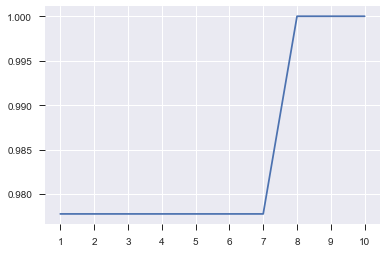

In [23]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

We used all the features of iris in above models. Now we will use Petals and Sepals Seperately
Creating Petals And Sepals Training Data

In [24]:
petal=iris[['petal_length','petal_width','species']]
sepal=iris[['sepal_length','sepal_width','species']]

In [25]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['petal_width','petal_length']]
train_y_p=train_p.species
test_x_p=test_p[['petal_width','petal_length']]
test_y_p=test_p.species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['sepal_width','sepal_length']]
train_y_s=train_s.species
test_x_s=test_s[['sepal_width','sepal_length']]
test_y_s=test_s.species

# SVM

In [26]:
model=svm.SVC(gamma='auto')
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC(gamma='auto')
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


# Linear Regression

In [27]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.6888888888888889
The accuracy of the Logistic Regression using Sepals is: 0.6444444444444445


# Decission Tree

In [28]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


# K-Nearest Neighbours

In [29]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


# Observations:
- Using Petals over Sepal for training the data gives a much better accuracy.
- This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.
- Thus we have just implemented some of the common Machine Learning. Since the dataset is small with very few features, I didn't cover some concepts as they would be relevant when we have many features.
- I have compiled a notebook covering some advanced ML concepts using a larger dataset. Have a look at that tooo.

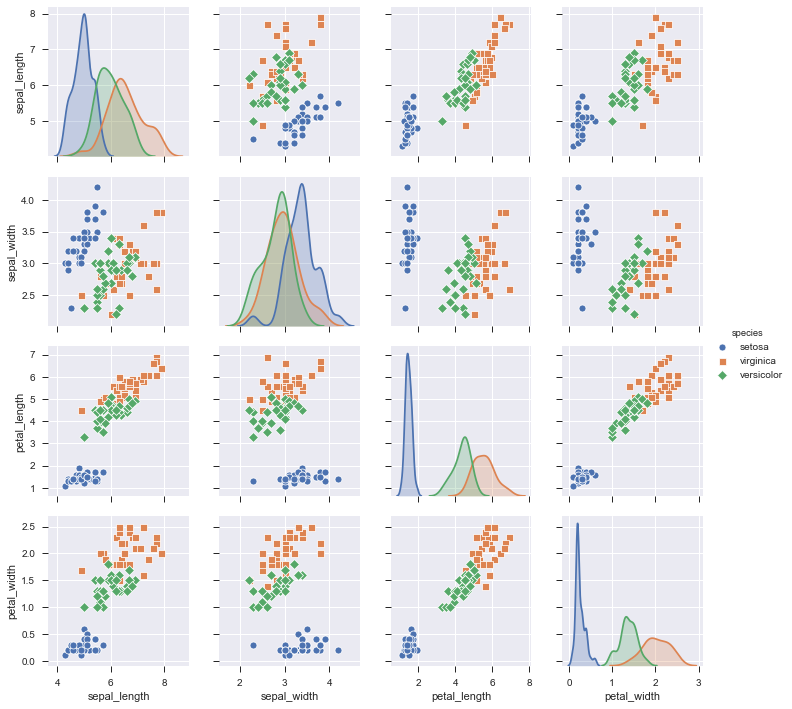

In [30]:
g = sns.pairplot(train, hue="species", markers=["o", "s", "D"])

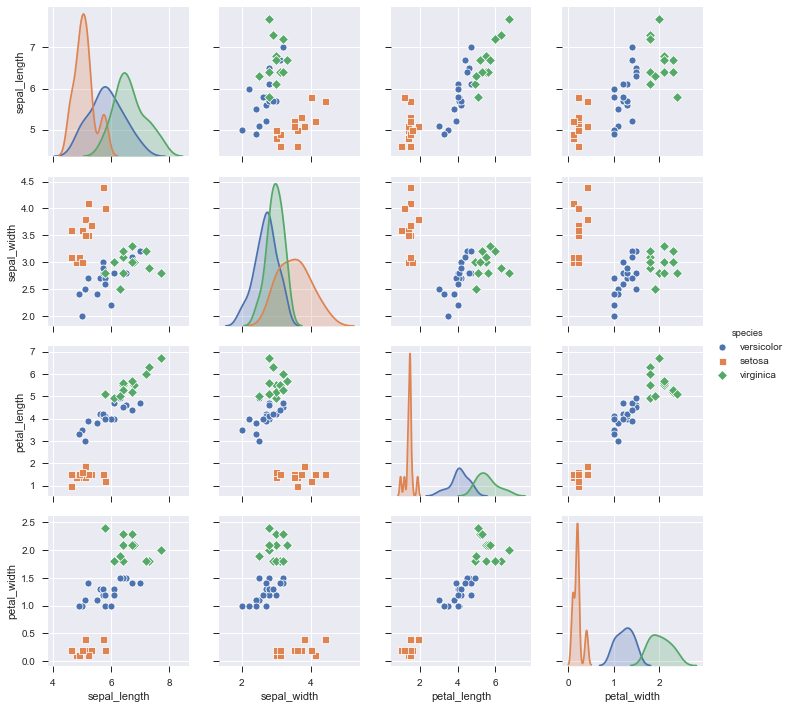

In [31]:
g = sns.pairplot(test, hue="species", markers=["o", "s", "D"])

# Visualizing 

In [32]:
from sklearn import datasets
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# Place the iris data into a pandas dataframe
iris_df = pd.DataFrame(iris.data[:, [2, 3]], columns=iris.feature_names[2:])

# View the first 5 rows of the data
print(iris_df.head())

# Print the unique labels of the dataset
print('\n' + 'The unique labels in this data are ' + str(np.unique(y)))

Populating the interactive namespace from numpy and matplotlib
   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

The unique labels in this data are [0 1 2]


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))
print()

There are 105 samples in the training set and 45 samples in the test set



In [34]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('After standardizing our features, the first 5 rows of our data now look like this:\n')
print(pd.DataFrame(X_train_std, columns=iris_df.columns).head())

After standardizing our features, the first 5 rows of our data now look like this:

   petal length (cm)  petal width (cm)
0          -0.182950         -0.293181
1           0.930661          0.737246
2           1.042022          1.638870
3           0.652258          0.350836
4           1.097702          0.737246


In [35]:
from sklearn.svm import SVC

svm = SVC(kernel='sigmoid', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)

print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train_std, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test_std, y_test)))
import warnings
from matplotlib.colors import ListedColormap

def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

The accuracy of the svm classifier on training data is 0.95 out of 1
The accuracy of the svm classifier on test data is 0.96 out of 1


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


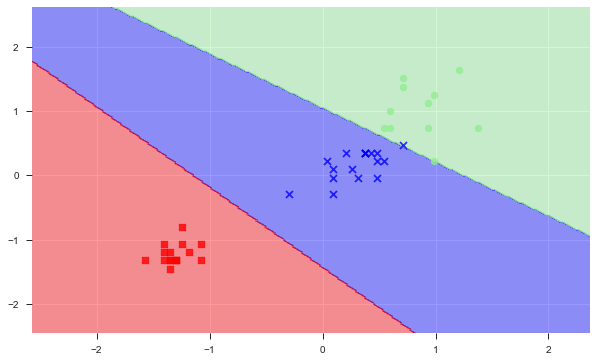

In [36]:
plot_decision_regions(X_test_std, y_test, svm)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(X_train_std, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(X_test_std, y_test)))

The accuracy of the knn classifier is 0.95 out of 1 on training data
The accuracy of the knn classifier is 1.00 out of 1 on test data


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


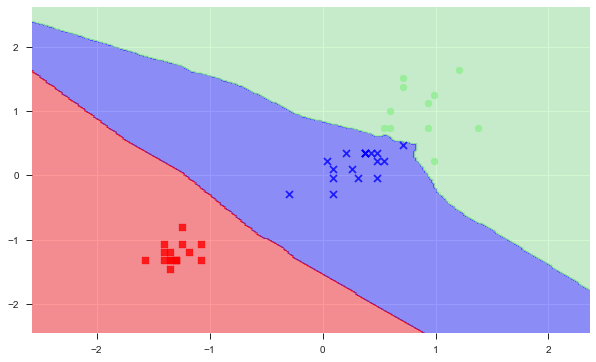

In [38]:
plot_decision_regions(X_test_std, y_test, knn)

In [39]:
!pip install xgboost

In [40]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train_std, y_train)

print('The accuracy of the xgb classifier is {:.2f} out of 1 on training data'.format(xgb_clf.score(X_train_std, y_train)))
print('The accuracy of the xgb classifier is {:.2f} out of 1 on test data'.format(xgb_clf.score(X_test_std, y_test)))

The accuracy of the xgb classifier is 0.98 out of 1 on training data
The accuracy of the xgb classifier is 0.98 out of 1 on test data


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


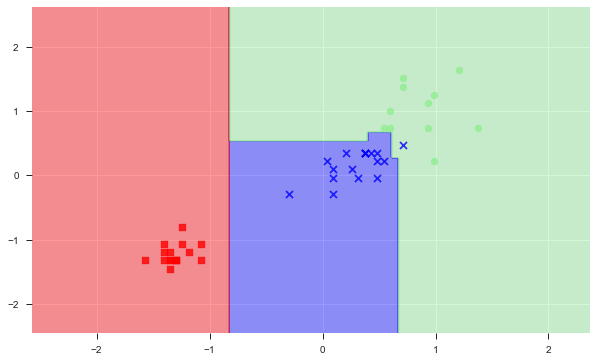

In [41]:
plot_decision_regions(X_test_std, y_test, xgb_clf)

## Visualize all 

In [42]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier

Automatically created module for IPython interactive environment


In [43]:
# Parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

In [44]:
# Load data
iris = load_iris()

In [45]:
plot_idx = 1

In [46]:
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)]

In [47]:
models

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best'),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=30,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
              

[0, 1]
DecisionTree with features [0, 1] has a score of 0.9266666666666666
RandomForest with 30 estimators with features [0, 1] has a score of 0.9266666666666666
ExtraTrees with 30 estimators with features [0, 1] has a score of 0.9266666666666666
AdaBoost with 30 estimators with features [0, 1] has a score of 0.84
[0, 2]
DecisionTree with features [0, 2] has a score of 0.9933333333333333
RandomForest with 30 estimators with features [0, 2] has a score of 0.9933333333333333
ExtraTrees with 30 estimators with features [0, 2] has a score of 0.9933333333333333
AdaBoost with 30 estimators with features [0, 2] has a score of 0.9933333333333333
[2, 3]
DecisionTree with features [2, 3] has a score of 0.9933333333333333
RandomForest with 30 estimators with features [2, 3] has a score of 0.9933333333333333
ExtraTrees with 30 estimators with features [2, 3] has a score of 0.9933333333333333
AdaBoost with 30 estimators with features [2, 3] has a score of 0.9933333333333333


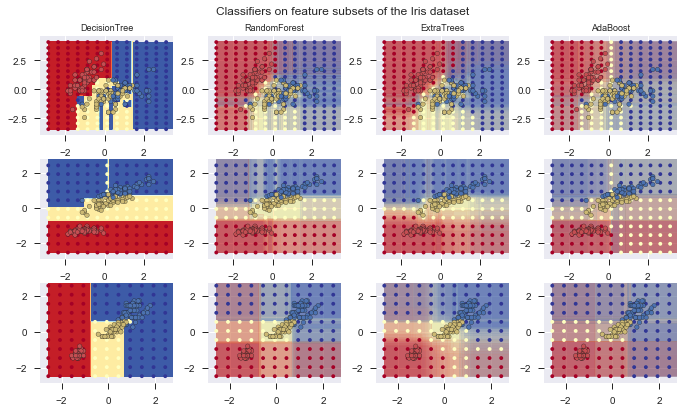

In [49]:
for pair in ([0, 1], [0, 2], [2, 3]):
    print(pair)
    for model in models:
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        model.fit(X, y)

        scores = model.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(
            ".")[-1][:-2][:-len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(
                len(model.estimators_))
        print(model_details + " with features", pair,
              "has a score of", scores)

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title, fontsize=9)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                         yy_coarser.ravel()]
                                         ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=cmap,
                                edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=ListedColormap(['r', 'y', 'b']),
                    edgecolor='k', s=20)
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Iris dataset", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

In [50]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import make_moons, make_circles, make_classification, load_iris

0
Nearest Neighbors has a score of 0.9933333333333333
Linear SVM has a score of 0.9933333333333333
RBF SVM has a score of 0.9933333333333333
Gaussian Process has a score of 0.9933333333333333
Decision Tree has a score of 0.9933333333333333
Random Forest has a score of 0.9933333333333333
Neural Net has a score of 0.9933333333333333
AdaBoost has a score of 0.9933333333333333
Naive Bayes has a score of 0.9933333333333333
QDA has a score of 0.9933333333333333
1
Nearest Neighbors has a score of 0.9933333333333333
Linear SVM has a score of 0.9933333333333333
RBF SVM has a score of 0.9933333333333333
Gaussian Process has a score of 0.9933333333333333
Decision Tree has a score of 0.9933333333333333
Random Forest has a score of 0.9933333333333333
Neural Net has a score of 0.9933333333333333
AdaBoost has a score of 0.9933333333333333
Naive Bayes has a score of 0.9933333333333333
QDA has a score of 0.9933333333333333
2
Nearest Neighbors has a score of 0.9933333333333333
Linear SVM has a score of 

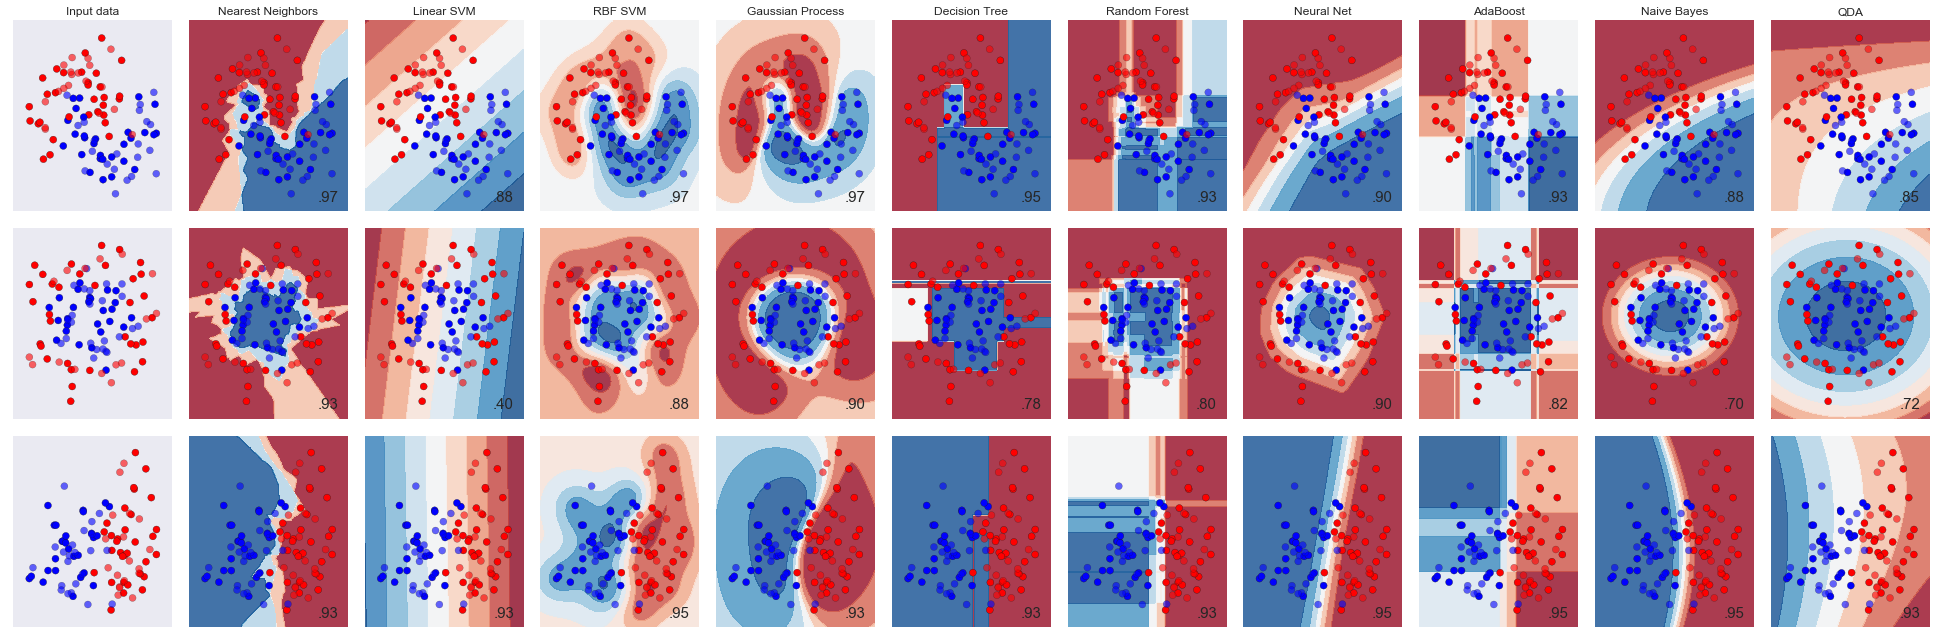

In [51]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
iris = load_iris()
IrisData = (iris.data[:, :2],iris.target)


datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            #,
            #IrisData
           ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    print(ds_cnt)
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        #print(score)
        model_title = name

        model_details = model_title
        if hasattr(names, " estimators_"):
            model_details += " with {} estimators".format(
                len(model.estimators_))
        print(model_details + " has a score of", scores)
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [52]:
#(iris.data[:, :2],iris.target)

In [56]:
!jupyter nbconvert "01 - Iris Data.ipynb" --to markdown

[NbConvertApp] Converting notebook 01 - Iris Data.ipynb to markdown
[NbConvertApp] Support files will be in 01 - Iris Data_files/
[NbConvertApp] Making directory 01 - Iris Data_files
[NbConvertApp] Making directory 01 - Iris Data_files
[NbConvertApp] Making directory 01 - Iris Data_files
[NbConvertApp] Making directory 01 - Iris Data_files
[NbConvertApp] Making directory 01 - Iris Data_files
[NbConvertApp] Making directory 01 - Iris Data_files
[NbConvertApp] Making directory 01 - Iris Data_files
[NbConvertApp] Making directory 01 - Iris Data_files
[NbConvertApp] Making directory 01 - Iris Data_files
[NbConvertApp] Making directory 01 - Iris Data_files
[NbConvertApp] Making directory 01 - Iris Data_files
[NbConvertApp] Making directory 01 - Iris Data_files
[NbConvertApp] Writing 1741445 bytes to 01 - Iris Data.md
